In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# load data
dataframe = pd.read_csv("Walmart_Store_sales.csv")
dataframe.head(10)

# add columns for day, month and year
dataframe["Day"]= pd.DatetimeIndex(dataframe['Date']).day
dataframe['Month'] = pd.DatetimeIndex(dataframe['Date']).month
dataframe['Year'] = pd.DatetimeIndex(dataframe['Date']).year
dataframe

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


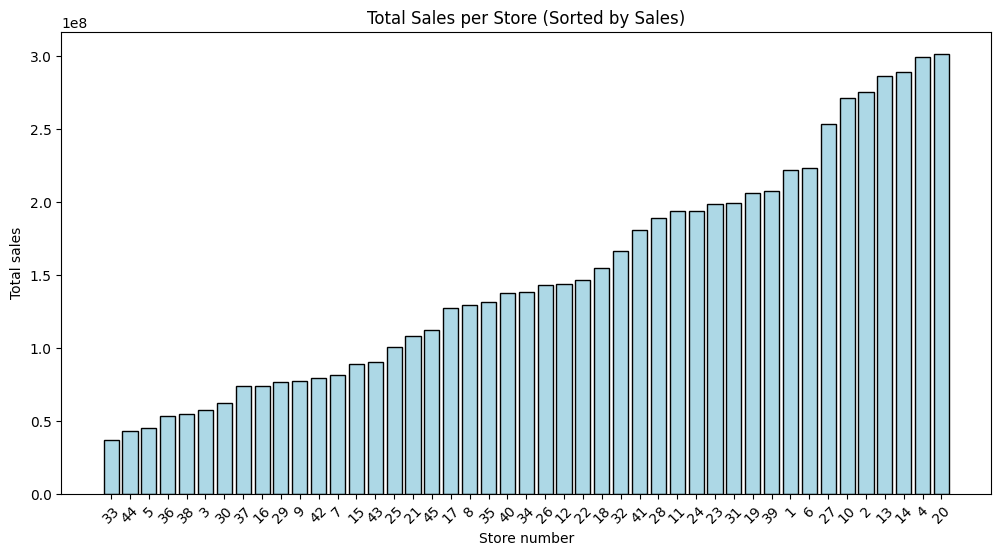

The store with the highest total weekly sales is store 20 with a total of 301397792.46 $ sales.


In [3]:
# get total sales per store
total_sales = dataframe.groupby('Store')['Weekly_Sales'].sum()
total_sales_sorted = total_sales.sort_values(ascending = True) 

# plot total sales
plt.figure(figsize=(12, 6))
plt.bar(total_sales_sorted.index.astype(str), total_sales_sorted.values, color = "lightblue", edgecolor = 'black')
plt.xlabel("Store number")
plt.ylabel("Total sales")
plt.title("Total Sales per Store (Sorted by Sales)")
plt.xticks(rotation = 45)

plt.show()

# find highest value
print(f"The store with the highest total weekly sales is store {total_sales.idxmax()} with a total of {total_sales.max()} $ sales.")

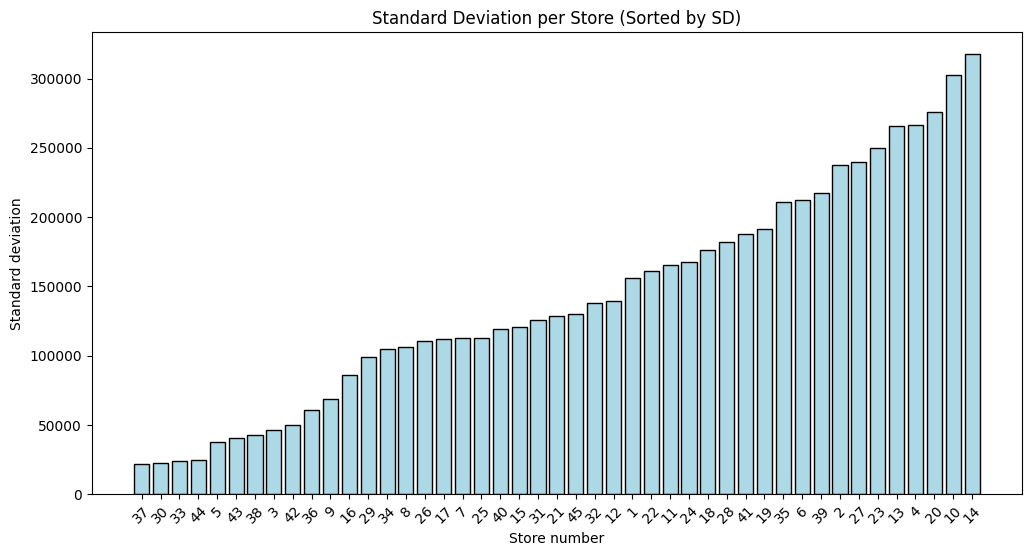

The store with the highest standard deviation is store 14 with a standard deviation of 317570 $.


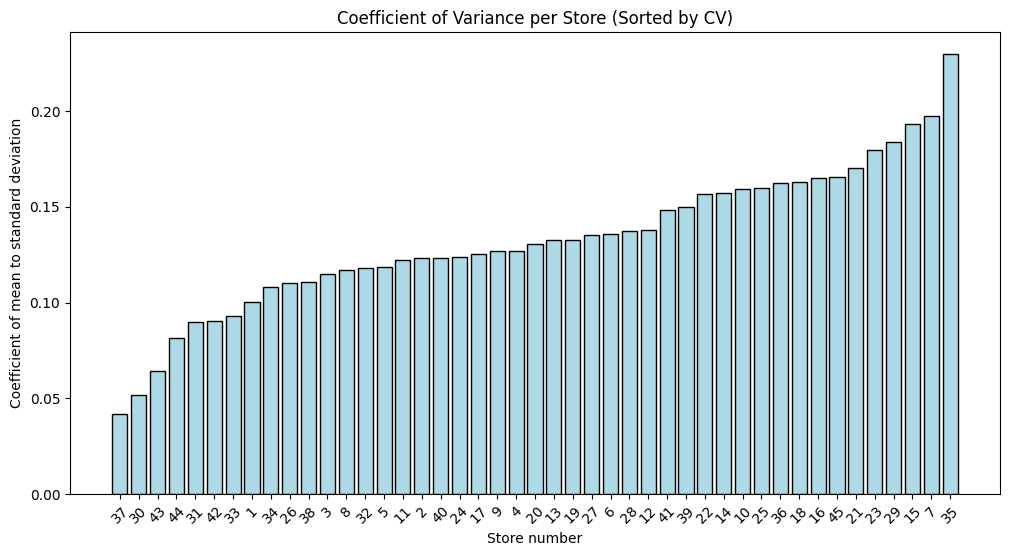

The store with the highest coefficient of mean to standard deviation is store 35 with a cv of 0.23.


In [4]:
# get standard deviation per store and save highest
sd = dataframe.groupby('Store')['Weekly_Sales'].std()
highest_sd = sd.max()
highest_sd_store = sd.idxmax()
sd_sorted = sd.sort_values(ascending = True) 

# calculate mean sales per store, then coeffient of variance per store
mean = dataframe.groupby('Store')['Weekly_Sales'].mean()
cv = sd / mean
highest_cv = cv.max()
highest_cv_store = cv.idxmax()
cv_sorted = cv.sort_values(ascending = True) 

# plot standard deviations
plt.figure(figsize=(12, 6))
plt.bar(sd_sorted.index.astype(str), sd_sorted.values, color = "lightblue", edgecolor = 'black')
plt.xlabel("Store number")
plt.ylabel("Standard deviation")
plt.title("Standard Deviation per Store (Sorted by SD)")
plt.xticks(rotation = 45)

plt.show()

print(f"The store with the highest standard deviation is store {highest_sd_store} with a standard deviation of {round(highest_sd)} $.")

# plot coefficients of variance
plt.figure(figsize=(12, 6))
plt.bar(cv_sorted.index.astype(str), cv_sorted.values, color = "lightblue", edgecolor = 'black')
plt.xlabel("Store number")
plt.ylabel("Coefficient of mean to standard deviation")
plt.title("Coefficient of Variance per Store (Sorted by CV)")
plt.xticks(rotation = 45)

plt.show()

print(f"The store with the highest coefficient of mean to standard deviation is store {highest_cv_store} with a cv of {round(highest_cv, 2)}.")

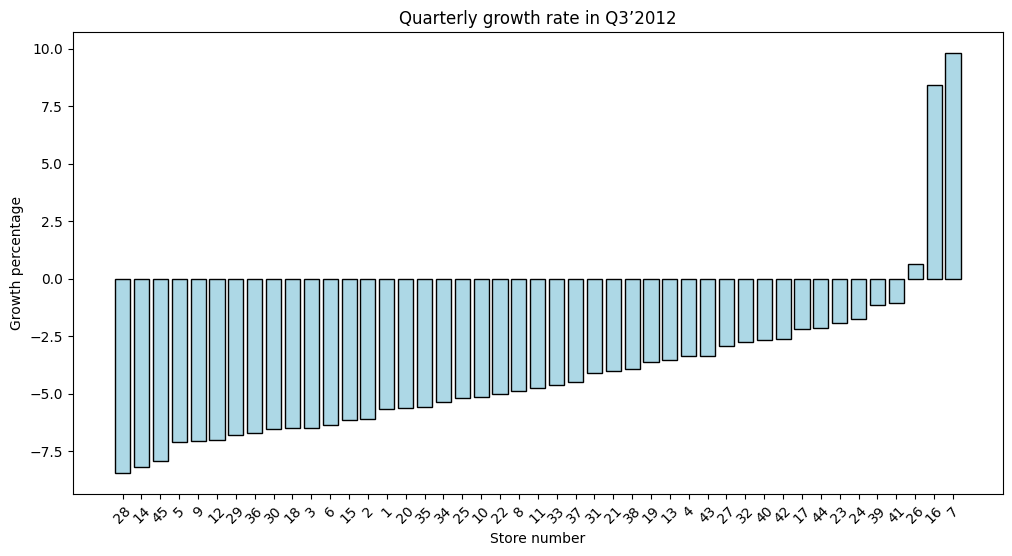

The stores that had good growth in Q3 2012 are stores 7, 16 and 26.
They reported growth rates of respectively 9.81, 8.41 and 0.66 percent.


In [5]:
# get total weekly sales per store for Q2 2012
Q2_data = dataframe[dataframe['Month'].isin([4, 5, 6])]
Q2_sales = Q2_data.groupby('Store')['Weekly_Sales'].sum()

# get total weekly sales per store for Q3 2012
Q3_data = dataframe[dataframe['Month'].isin([7, 8, 9])]
Q3_sales = Q3_data.groupby('Store')['Weekly_Sales'].sum()

# get growth rates of every store
growth_df = (Q3_sales / Q2_sales) * 100 - 100
growth_sorted = growth_df.sort_values(ascending = True)

# plot growth rates
plt.figure(figsize=(12, 6))
plt.bar(growth_sorted.index.astype(str), growth_sorted.values, color = "lightblue", edgecolor = 'black')
plt.xlabel("Store number")
plt.ylabel("Growth percentage")
plt.title("Quarterly growth rate in Q3’2012")
plt.xticks(rotation = 45)

plt.show()

# find stores that did not have negative growth
good_stores = round(growth_df[growth_df > 0], 2)
print(f"The stores that had good growth in Q3 2012 are stores {good_stores.index[0]}, {good_stores.index[1]} and {good_stores.index[2]}.")
print(f"They reported growth rates of respectively {good_stores.values[0]}, {good_stores.values[1]} and {good_stores.values[2]} percent.")

In [6]:
# split dataframe into holiday data and non-holiday data
holiday_data = dataframe[dataframe['Holiday_Flag'] == 1]
non_holiday_data = dataframe[dataframe['Holiday_Flag'] == 0]

In [23]:
super_bowl_dates =['12-02-2010', '11-02-2011', '10-02-2012']
labour_day_dates =  ['10-09-2010', '09-09-2011', '07-09-2012']
thanksgiving_dates =  ['26-11-2010', '25-11-2011', '23-11-2012']
christmas_dates = ['31-12-2010', '30-12-2011', '28-12-2012']

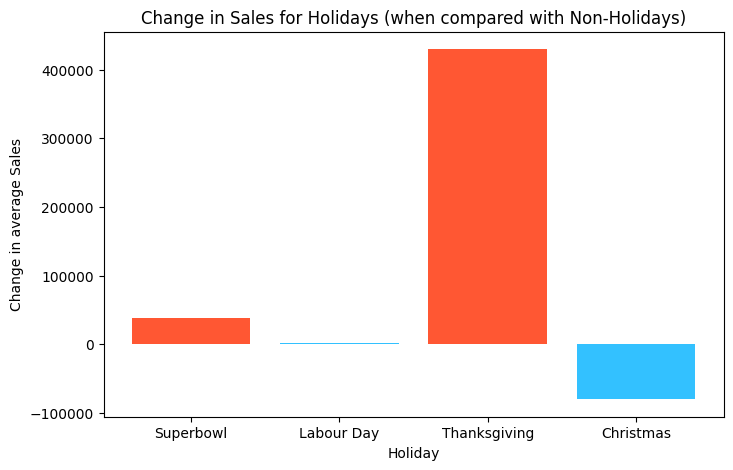

Thanksgiving increases the average sales by 430017 $ while Christmas decreases the average sales by 80423 $.


In [24]:
# get mean sales per holiday and for non-holidays for all stores together
holiday_data.loc[:, 'Date'] = holiday_data['Date'].astype(str)
superbowl_sales = holiday_data[holiday_data['Date'].isin(super_bowl_dates)]['Weekly_Sales'].mean()
labourday_sales = holiday_data[holiday_data['Date'].isin(labour_day_dates)]['Weekly_Sales'].mean()
thanksgiving_sales = holiday_data[holiday_data['Date'].isin(thanksgiving_dates)]['Weekly_Sales'].mean()
christmas_sales = holiday_data[holiday_data['Date'].isin(christmas_dates)]['Weekly_Sales'].mean()
total_mean_sales = non_holiday_data['Weekly_Sales'].mean()

# variables for plotting
categories = ["Superbowl", "Labour Day", "Thanksgiving", "Christmas"]
sales_values = [superbowl_sales, labourday_sales, thanksgiving_sales, christmas_sales]

# subtract the 'normal' amount of sales from the holiday sales
for i in range(len(sales_values)):
    sales_values[i] -= total_mean_sales

# Plotting the data
plt.figure(figsize=(8, 5))
plt.bar(categories, sales_values, color=['#FF5733', '#33C1FF'])

# Adding labels and title
plt.xlabel('Holiday')
plt.ylabel('Change in average Sales')
plt.title('Change in Sales for Holidays (when compared with Non-Holidays)')

# Show the plot
plt.show()

print(f"Thanksgiving increases the average sales by {round(sales_values[2])} $ while Christmas decreases the average sales by {round(-sales_values[3])} $.")

It seems that holidays over all increase the amount of sales that are made, except for Christmas. This makes sense since everyone does their shopping before the actual christmas days. Superbowl and Labour Day have very minor increases in sales, both of which are probably non-significant. Thanksgiving is the only holiday which gives a major increase in sales.